<a href="https://colab.research.google.com/github/SachinScaler/Apr24_TimeSeries_and_RecSys/blob/main/Time_Series_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg

Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /content/mobilesales.xlsx
100% 13.7k/13.7k [00:00<00:00, 31.5MB/s]


In [53]:
import pandas as pd

mobile_sales = pd.read_excel('mobilesales.xlsx')
mobile_sales.head(13)

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0
5,2001-06-01,8104.0
6,2001-07-01,7813.0
7,2001-08-01,8279.0
8,2001-09-01,7014.0
9,2001-10-01,7985.0


In [54]:
mobile_sales.tail()

,DATE,Sales
212,2018-09-01,13838.0
213,2018-10-01,15351.0
214,2018-11-01,15615.0
215,2018-12-01,16941.0
216,2019-01-01,12160.0


In [55]:
mobile_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    217 non-null    datetime64[ns]
 1   Sales   198 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


In [56]:
18*12+1

217

- All the date entries are present

#### pd.to_datetime() Can be used to convert non-datetime columnns into dt cols

In [57]:
mobile_sales.describe()

,DATE,Sales
count,217,198.000000
mean,2009-12-31 04:25:26.267281152,10842.757576
min,2001-01-01 00:00:00,108.000000
25%,2005-07-01 00:00:00,8856.000000
50%,2010-01-01 00:00:00,10745.000000
75%,2014-07-01 00:00:00,12399.750000
max,2019-01-01 00:00:00,23740.000000
std,NaN,2605.006293


In [58]:
mobile_sales.set_index('DATE', inplace =True)
mobile_sales.head()

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0


- Hourly, minutes, second based observation
- Daily Gap
- Weekly Observation
- Monthly Observation
- Quarterly Observation
- Annual Observation
- 5 year Observation

<Axes: xlabel='DATE'>

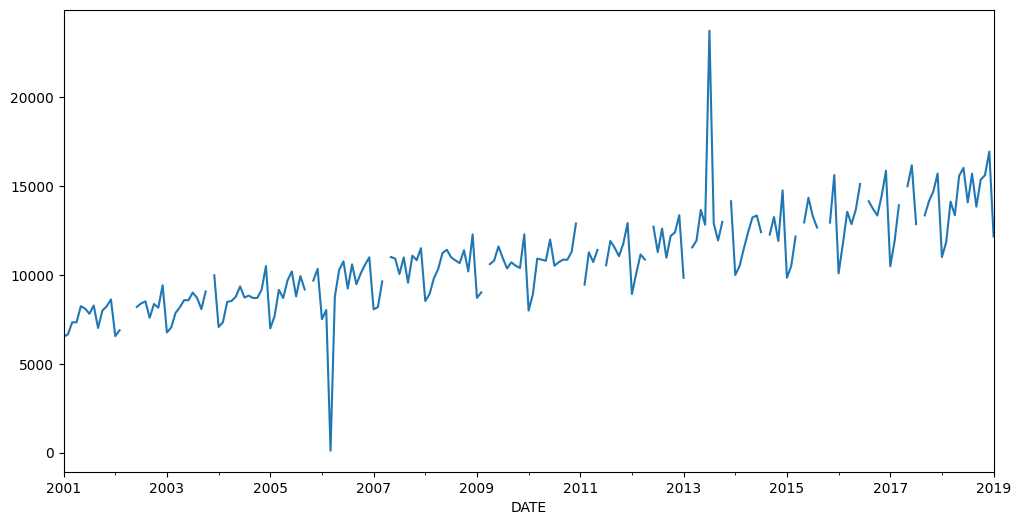

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
mobile_sales.Sales.plot()

### How can we handle Missing Values:

What shall we impute/fill missing values with?

In [60]:
### linear interpolation code

mobile_sales.Sales = mobile_sales.Sales.interpolate(method='linear')


<Axes: xlabel='DATE'>

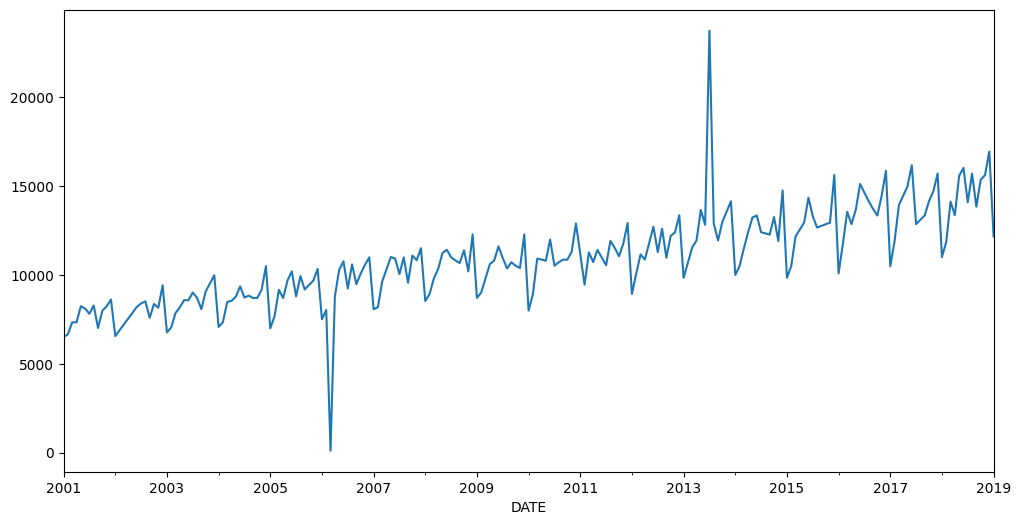

In [61]:
import matplotlib.pyplot as plt

mobile_sales.Sales.plot(figsize=(12,6))

[]

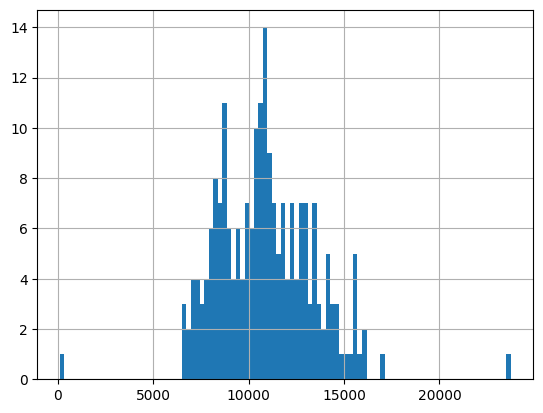

In [62]:
### let's visualize distribution of sales
mobile_sales.Sales.hist(bins=100).plot()

### <0.02 and 0.98>

In [63]:
lower = mobile_sales.Sales.quantile(0.02)
lower

6802.44

In [64]:
upper = mobile_sales.Sales.quantile(0.98)
upper

15809.400000000001

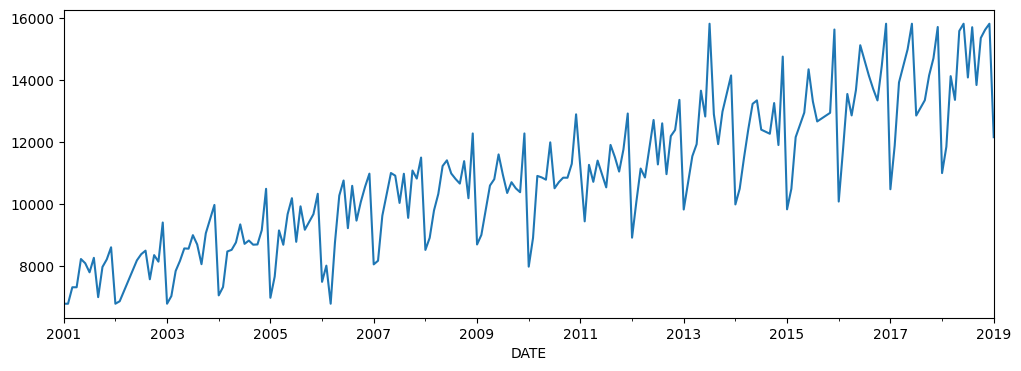

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

mobile_sales.Sales = mobile_sales.Sales.clip(upper = upper, lower = lower)
mobile_sales.Sales.plot(figsize=(12,4))
plt.show()

In [66]:
import statsmodels

### Moving Average in Pandas
Let's Calculate rolling mean/avg

In [67]:
window_size=3 # window size -1 values will be nan
mobile_sales.Sales.rolling(window_size).mean()

DATE
2001-01-01             NaN
2001-02-01             NaN
2001-03-01     6978.960000
2001-04-01     7155.480000
2001-05-01     7634.666667
                  ...     
2018-09-01    14538.333333
2018-10-01    14962.000000
2018-11-01    14934.666667
2018-12-01    15591.800000
2019-01-01    14528.133333
Name: Sales, Length: 217, dtype: float64

<Axes: xlabel='DATE'>

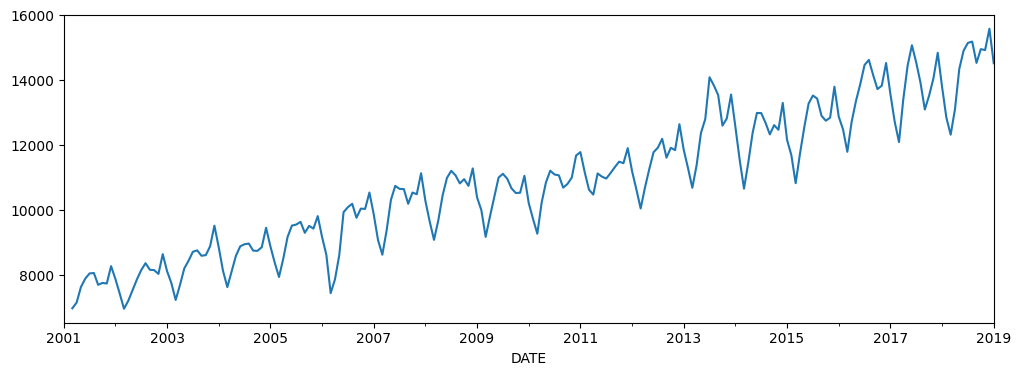

In [68]:
ma = mobile_sales.Sales.rolling(window_size, center=False).mean()
ma.plot(label='smoothed', figsize=(12,4))

<Axes: xlabel='DATE'>

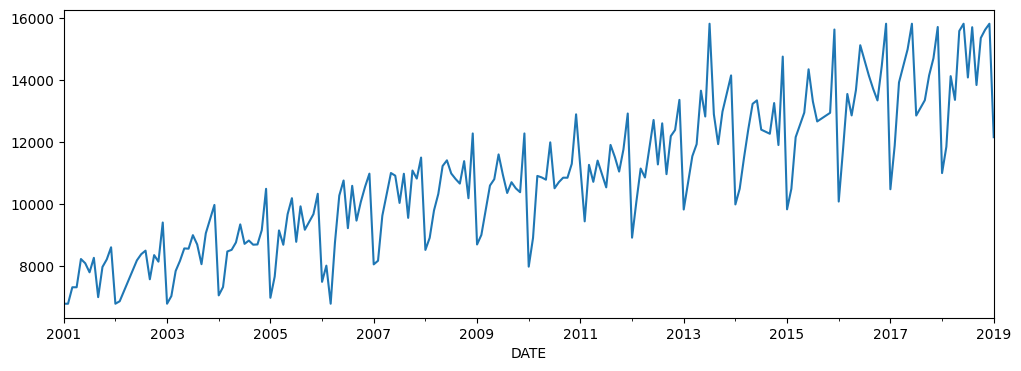

In [69]:
mobile_sales.Sales.plot(figsize=(12,4))

<Axes: xlabel='DATE'>

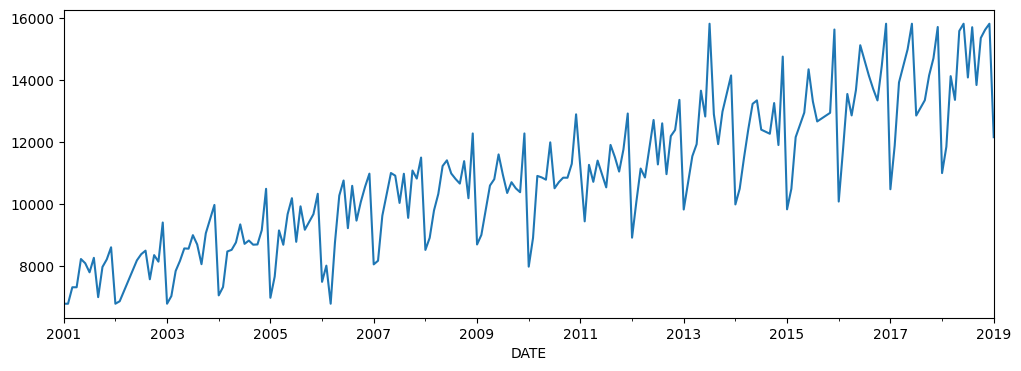

In [70]:
window_size=1
mobile_sales.Sales.rolling(window_size, center=False).mean().plot(label='smoothed', figsize=(12,4))

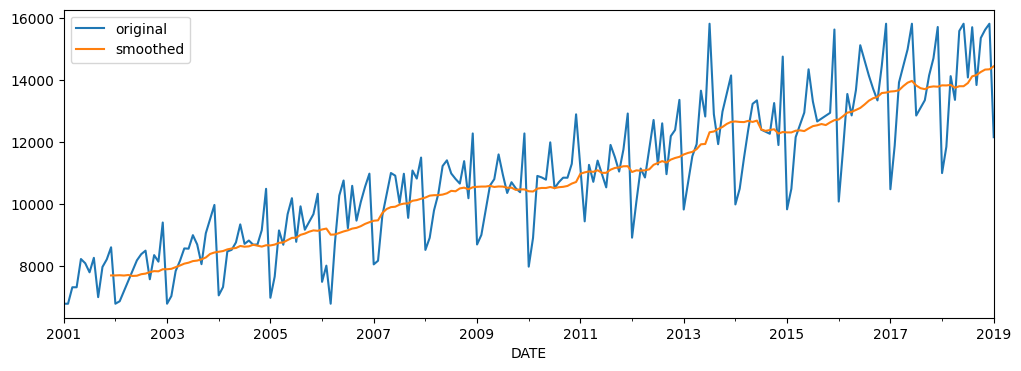

In [71]:
window_size=12
# Plot original data
mobile_sales.Sales.plot(label='original')

# Plot data after implementing Moving Averages
mobile_sales.Sales.rolling(window_size, center=False).mean().plot(label='smoothed', figsize=(12,4))
plt.legend()

### Centered MA

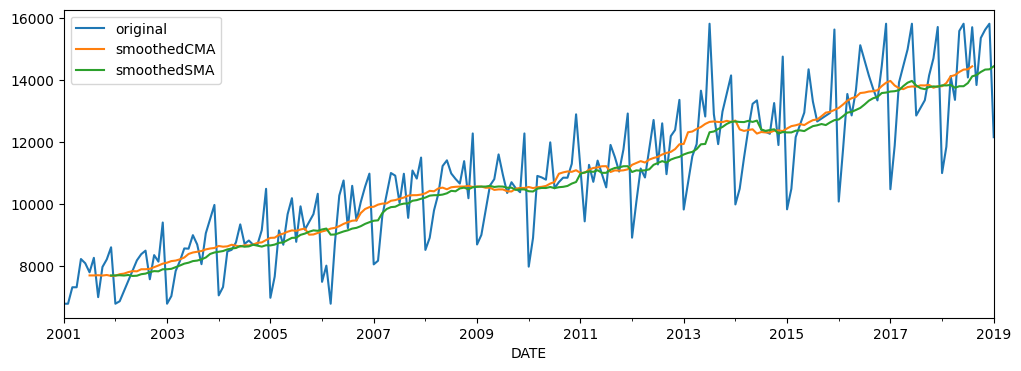

In [72]:
window_size=12
# Plot original data
mobile_sales.Sales.plot(label='original')

# Plot data after implementing Moving Averages
mobile_sales.Sales.rolling(window_size, center=True).mean().plot(label='smoothedCMA', figsize=(12,4))
mobile_sales.Sales.rolling(window_size, center=False).mean().plot(label='smoothedSMA', figsize=(12,4))

plt.legend()

#### Subtract trend from original sales and plot

<Axes: xlabel='DATE'>

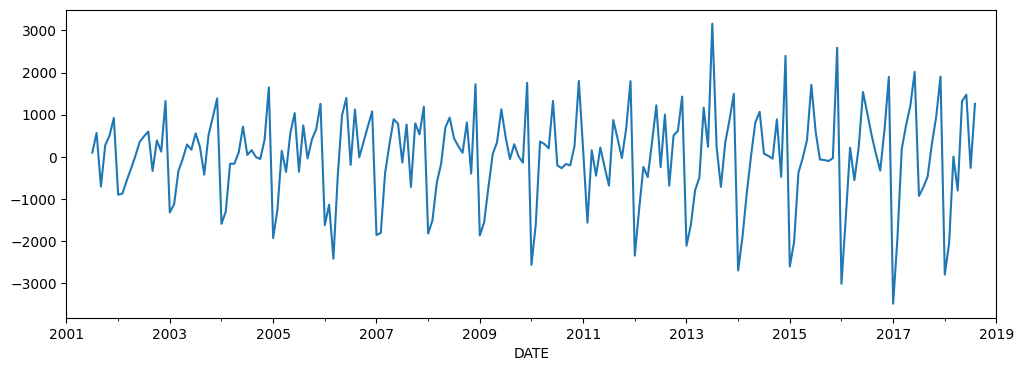

In [73]:
yt = mobile_sales.Sales.rolling(window_size, center=True).mean()
st_et =  mobile_sales.Sales - yt
st_et.plot(figsize=(12,4))

### Let's do time series decomposition with statsmodel

In [74]:
import statsmodels.api as sm

model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='additive')

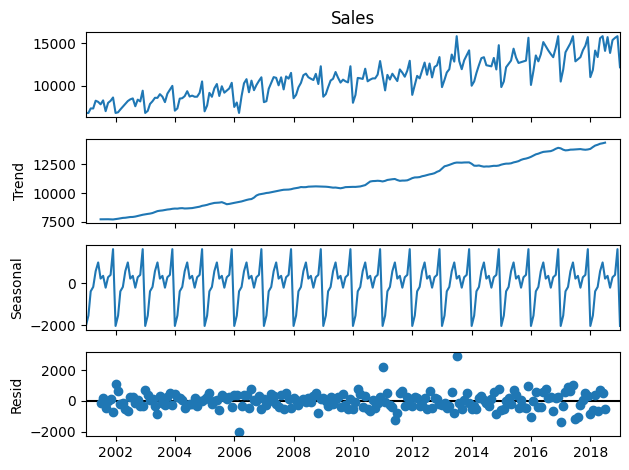

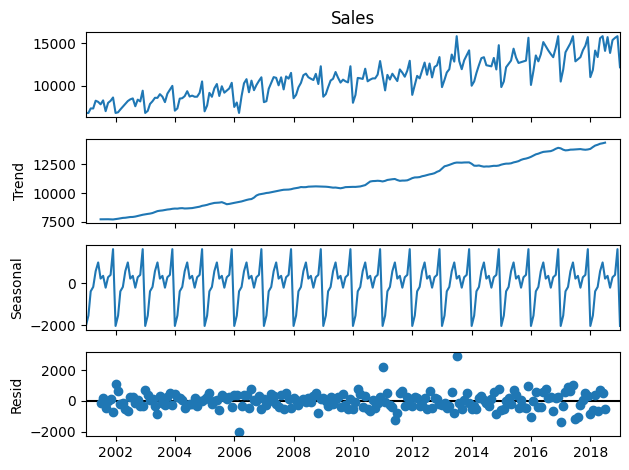

In [75]:
model.plot()

<Axes: xlabel='DATE'>

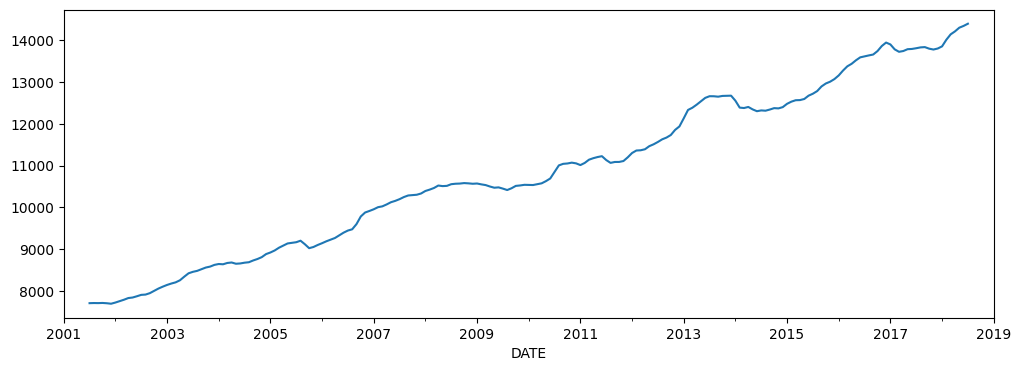

In [76]:
model.trend.plot(figsize=(12,4))

<Axes: xlabel='DATE'>

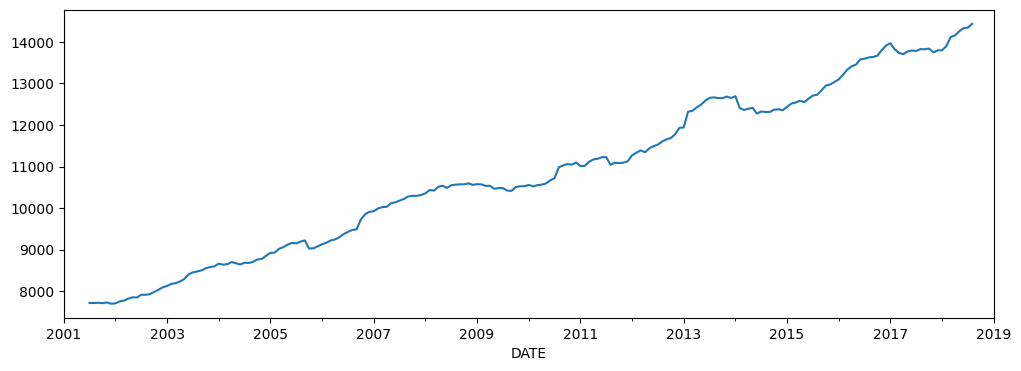

In [77]:
window_size=12
mobile_sales.Sales.rolling(window_size, center=True).mean().plot(label='smoothed', figsize=(12,4))

<Axes: xlabel='DATE'>

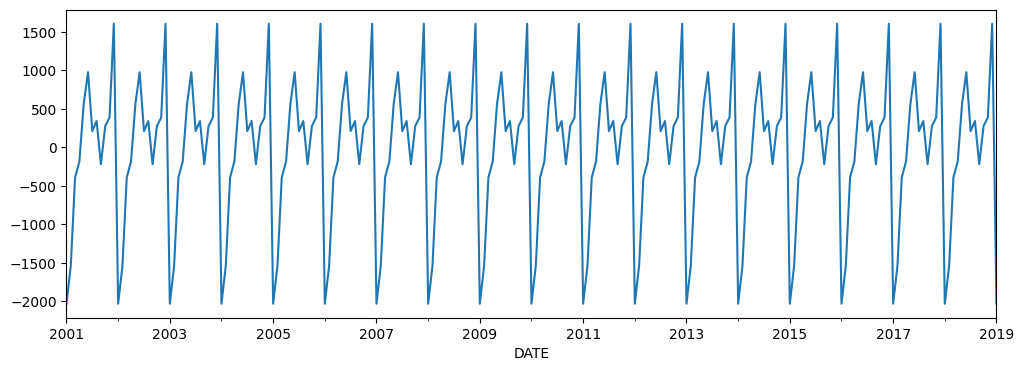

In [78]:
model.seasonal.plot(figsize=(12,4))

<Axes: xlabel='DATE'>

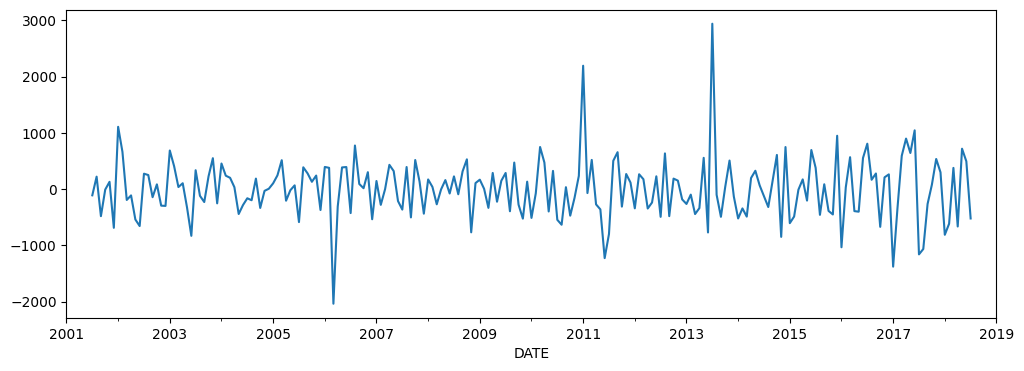

In [79]:
model.resid.plot(figsize=(12,4))

<Axes: >

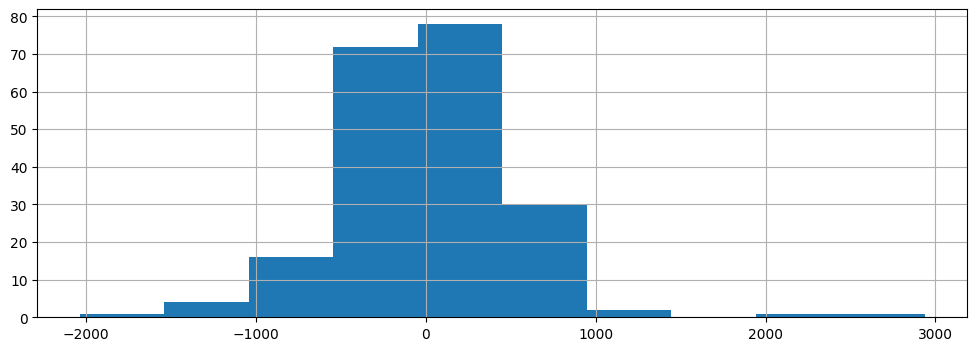

In [80]:
model.resid.hist(figsize=(12,4))

In [81]:
model.resid.mean()

-3.2316417029771514

### Agenda 2: Forecast with MAPE <=5

In [82]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)


### Creating function to measure and print all three metric
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

performance([100], [98])

MAE : 2.0
RMSE : 2.0
MAPE: 0.02


In [83]:
mobile_sales.Sales.mean()

10862.567741935485

### Train Test Split

- let's select last 12 months as test

In [96]:
int(len(mobile_sales)*0.2)

43

In [90]:
train_max_date = mobile_sales.index[-12]
train_max_date

Timestamp('2018-02-01 00:00:00')

### Slicing and select all values before the max_date into training and remaining into test

In [91]:
train_x = mobile_sales.loc[mobile_sales.index < mobile_sales.index[-12]].copy()
test_x = mobile_sales.loc[mobile_sales.index >= mobile_sales.index[-12]].copy()


In [92]:
train_x

,Sales
DATE,
2001-01-01,6802.44
2001-02-01,6802.44
2001-03-01,7332.00
2001-04-01,7332.00
2001-05-01,8240.00
...,...
2017-09-01,13349.00
2017-10-01,14150.00
2017-11-01,14698.00


In [93]:
test_x

,Sales
DATE,
2018-02-01,11852.0
2018-03-01,14123.0
2018-04-01,13360.0
2018-05-01,15576.0
2018-06-01,15809.4
2018-07-01,14080.0
2018-08-01,15697.0
2018-09-01,13838.0
2018-10-01,15351.0


In [97]:
preds = train_x.Sales.mean()
preds

10653.201951219511

In [100]:
test_x['pred'] = preds
train_x['pred'] = preds

<Axes: xlabel='DATE'>

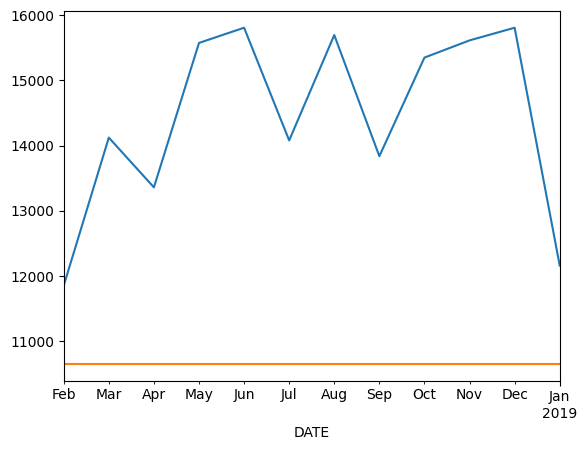

In [103]:
test_x['Sales'].plot(label='original')
test_x['pred'].plot(label="mean_preds")

In [104]:
performance(test_x['Sales'], test_x['pred'])

MAE : 3786.031
RMSE : 4025.906
MAPE: 0.255


### Simple Naive

MAE : 3434.233
RMSE : 3697.005
MAPE: 0.23


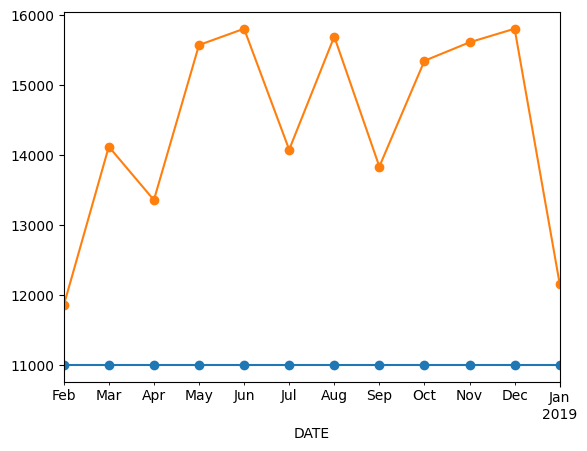

In [108]:
test_x['pred'] = train_x['Sales'][-1]
test_x['pred'].plot(label="mean_preds", style= '-o')
test_x['Sales'].plot(label='original', style='-o')
performance(test_x['Sales'], test_x['pred'])

In [109]:
### Naive seasonal

for i in test_x.index:
    test_x.loc[i]['pred'] = train_x.loc[i-pd.DateOffset(years=1)]['Sales']

test_x

<ipython-input-109-23db85668f9b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x.loc[i]['pred'] = train_x.loc[i-pd.DateOffset(years=1)]['Sales']


,Sales,pred
DATE,,
2018-02-01,11852.0,11005.0
2018-03-01,14123.0,11005.0
2018-04-01,13360.0,11005.0
2018-05-01,15576.0,11005.0
2018-06-01,15809.4,11005.0
2018-07-01,14080.0,11005.0
2018-08-01,15697.0,11005.0
2018-09-01,13838.0,11005.0
2018-10-01,15351.0,11005.0


In [123]:
test_x['pred']=train_x.iloc[-12:]['Sales'].values
test_x

,Sales,pred
DATE,,
2018-02-01,11852.0,11891.0
2018-03-01,14123.0,13921.0
2018-04-01,13360.0,14453.5
2018-05-01,15576.0,14986.0
2018-06-01,15809.4,15809.4
2018-07-01,14080.0,12856.0
2018-08-01,15697.0,13102.5
2018-09-01,13838.0,13349.0
2018-10-01,15351.0,14150.0


MAE : 800.867
RMSE : 1067.837
MAPE: 0.055


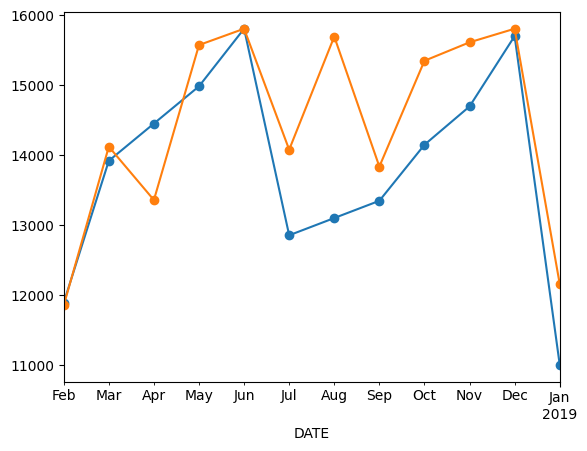

In [124]:

test_x['pred'].plot(label="mean_preds", style= '-o')
test_x['Sales'].plot(label='original', style='-o')
performance(test_x['Sales'], test_x['pred'])

### In next session:
- drift: focuses on trend only
- smoothing based method for forecasting
- Exponential Smoothing"